# Josephson Junctions and homoclinic bifurcations

In [1]:

# to clear variables use: %reset
import numpy as np # basic package to do computation
import pylab as plt # package to plot
from matplotlib.colors import cnames # colors for plots

import cmath  # complex numbers
import random # random numbers

from scipy.integrate import odeint # ode solver 
from scipy import linalg as la

import sympy as sym
from sympy.solvers import solve # package for symbolic computations (use of unassigned variables)
#from sympy import Symbol 
#from sympy.matrices import Matrix
#from sympy import sin
#from sympy import cos


Bad key "text.kerning_factor" on line 4 in
/Users/sdebuyl/.conda/envs/vub_37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Definition of parameters & variables 
I_v = .8
alpha_v= .3

phi=sym.Symbol('phi')  # displacement of the oscillator from its equilibrium position
y=sym.Symbol('y')  # velocity of the oscillator

Y=sym.Matrix([phi,y]) # create an array with x and v

Encode the Josephson Junction equations $$ \dot{ \phi} = y, \, \dot{y}= I \, -  \, sin( \phi ) - \, \alpha \,  y $$

We can assume that $I>0$ and $\alpha > 0$.

In [20]:
# Definition of system (dX_dt = f(X)) for symbolic computations
def dX_dt(X,I,alpha):
    """ Return the derivative of x and v (encoded in X: x=X[0] and v=X[1]) """
    return sym.Matrix([ X[1] ,  I - sym.sin(X[0]) - alpha*X[1]])

# Definition of system but with an array instead of a matrix for practical purposes 
def dX_dta(X,I,alpha):
    """ Return the derivative of x and v (encoded in X: x=X[0] and v=X[1]) """
    return np.array([ X[1] , I - np.sin(X[0]) - alpha*X[1] ])

# A third version (to plot the trajectories on the phase space)

def calc_deri(yvec, time,I,alpha):
     return (yvec[1], I - sym.sin(yvec[0]) - alpha*yvec[1] )
    
# it should be possible to use only one verison:)    

## Fixed points

Obviously, $y^\star$ must be zero, and $\sin{\phi^\star}=I$. Therefore, 

(a) $I<I_c = 1$ : we have two fixed points ($I=Ic$ only one). 

(b) $I>I_c$ : we do not have fixed points... what do we have then? 

In [21]:
I = sym.Symbol('I')
alpha = sym.Symbol('alpha')
alpha

alpha

## Linear stability analysis $I < 1$

In [22]:
jacX=dX_dt(Y,I,alpha).jacobian(Y)
detjacX=jacX[0,0]*jacX[1,1]-jacX[0,1]*jacX[1,0]
print("Tr = ", jacX[0,0] + jacX[1,1])
print("det =", detjacX)
      #print("The trace is %5.2f and the determinant"  % float(np.trace(jacX)),detjacX)
print("Tr^2 - 4 det = ", (jacX[0,0] + jacX[1,1])**2-4*detjacX)


Tr =  -alpha
det = cos(phi)
Tr^2 - 4 det =  alpha**2 - 4*cos(phi)


The trace is always negative. 

When we have fixed points, one will have a positive det and the other one a negative det. Indeed the determinant evaluated at the fixed points is given by $\Delta = \pm \sqrt{(1 - I^2)}$ 

For the fixed point with negative determinant, we have a saddle.

For the fixed point with positive determinant, we have a stable node or stable spiral. A stable node if $\alpha^2 -4 \sqrt{(1 - I^2)} >0$ and a stable spiral if $\alpha^2 -4 \sqrt{(1 - I^2)} < 0$. 

When $\alpha^2 -4 \sqrt{(1 - I^2)} = 0$, we have a bifurcation. 


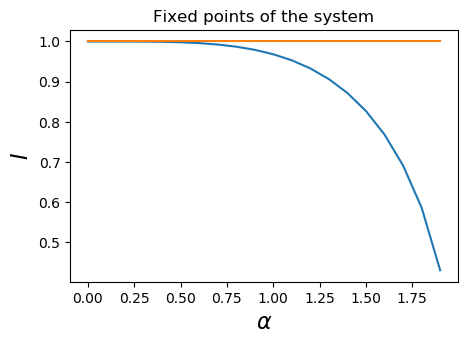

In [23]:
fig = plt.figure(figsize=(15/3, 10/3), dpi=100)
plt.title('Fixed points of the system')
x=np.arange(0, 2, .1)
plt.plot(x,(1-x**4/16)**(1/2))
plt.plot(x,np.ones(20))
plt.xlabel(r'$\alpha$',fontsize=16)
plt.ylabel(r'$I$',fontsize=16)
plt.show()

Under the orange line, we have two fixed points. One of them is a saddle for all parameter values (under $I=1$) and the other is a stable node or spiral (if above/under the blue curve). The blue line is not really a bifrucation as the fixed point remain stable when crossing the line. 

The orange line is a saddle node bifurcation. 

## We have seen that limit cycles exist for $I>1$. When $\alpha$ is small, they can coexist with the fixed points (ie, they are still present for $I<1$):



We choose first parameters for the trajectories to plot on the phase portrait:

In [40]:
tmax = 3000
number_of_time_steps= 5000
time_vec = np.linspace(0, tmax, number_of_time_steps)

tmax = 50
number_of_time_steps= 1000
time_vec = np.linspace(0, tmax, number_of_time_steps)


Let us look a one point in the bistable region

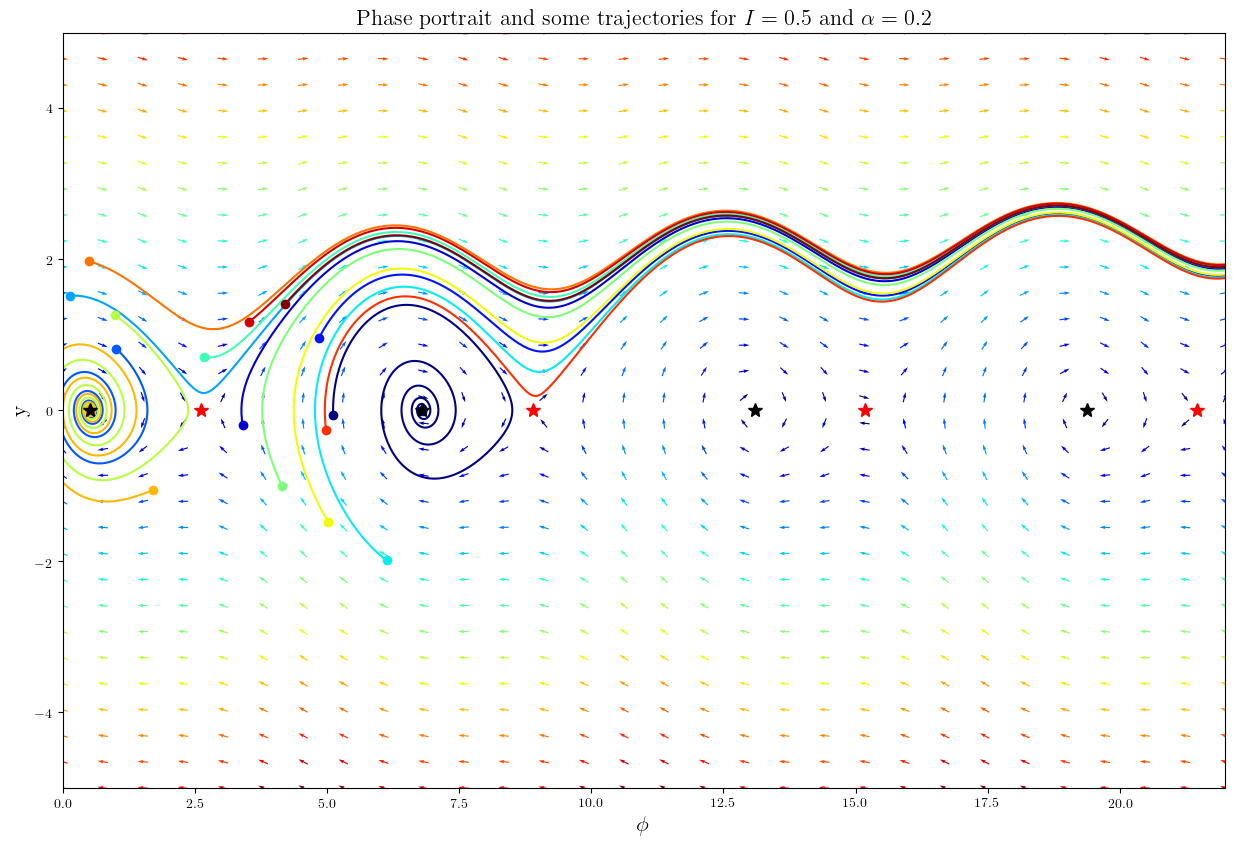

In [42]:
alpha_v=.2
for I_v in [.5]: #here we fixed the value of I. 
    sol=solve(calc_deri(Y,0,I_v,alpha_v),Y)
    numb_sol=len(sol)
    # range for the axis:
    ymax=5
    ymaxb=2
    ymin=-ymax
    yminb = -ymaxb
    xmax=7*np.pi
    
    # number of arrows plotted on the phase portrait
    nb_points= 30                   

    # points where the arrows will be placed given by the grid X1,Y1
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(ymin, ymax, nb_points)
    X1 , Y1  = np.meshgrid(x, y)                       # create a grid
    
    # direction of the arrows
    DX1, DY1 = dX_dta([X1, Y1],I_v,alpha_v)                      # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 

    DX1 /= M                                        # Normalize each arrows 
    DY1 /= M                          


    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
   
    fig = plt.figure(figsize=(15, 10), dpi=100)
    plt.rc('text', usetex=True)  #for latex rendering in the figure's texts
    plt.rc('font', family='serif')

    plt.xlim(0, xmax) # impose limits on the axis
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\phi$',fontsize=16)
    plt.ylabel(r'y ',fontsize=16)
    plt.title(r"Phase portrait and some trajectories for "
              r'$I ={0}$ and $\alpha = {1}$'.format(I_v,alpha_v), fontsize=16, color='black')
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', scale=110,width=0.001,cmap=plt.cm.jet)
    #plt.legend()
    # plt.grid()
   
    N_trajectories=15  #number of trajectories plotted on top of the velocity field
    colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))
    i=0
    if True:
        for y0 in range(N_trajectories):
            
            yinit = (random.random()*2*np.pi, yminb+random.random()*(ymaxb-yminb))
            yarr = odeint(calc_deri, yinit, time_vec, args=(I_v,alpha_v))
            plt.plot(yarr[:, 0], yarr[:, 1], label='traject',color=colors[i])
            plt.plot([yarr[0,0]], [yarr[0,1]], 'o',color=colors[i]) # start
            plt.plot([yarr[-1,0]], [yarr[-1,1]], 's',color=colors[i]) # end
            i=i+1

    if numb_sol==2:
        temp1=np.array(sol[1][0]).astype(np.complex)
        temp2=np.array(sol[0][0]).astype(np.complex)
        
        if temp1.imag==0 and temp2.imag==0:
            for jj in range(5):
             plt.plot(sol[1][0]+2*np.pi*jj,sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[0][0]+2*np.pi*jj,sol[0][1],'*',color='black', markersize=10)
            
    plt.show()
# 

Let us focus on the trajectory starting near the saddle (not AT the saddle because otherwise it just stays there), and let us try to see what is happening with the limit cycle when $I$ decrease:

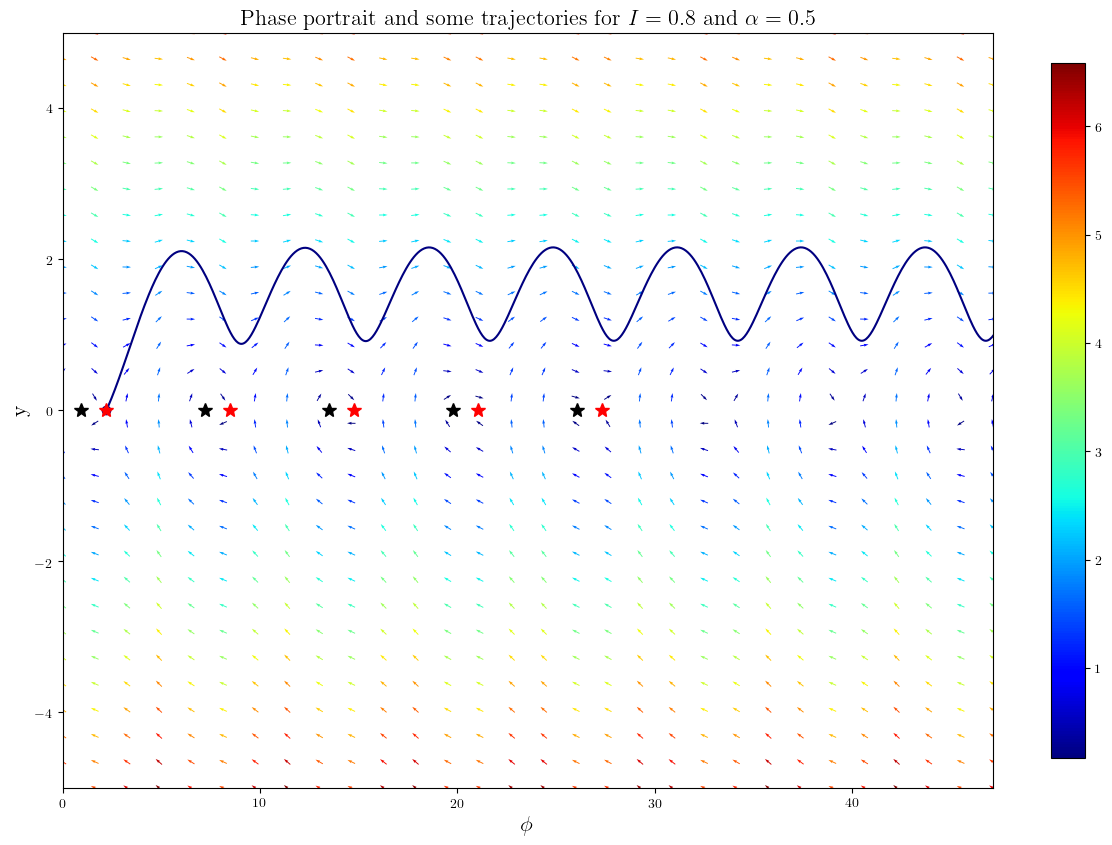

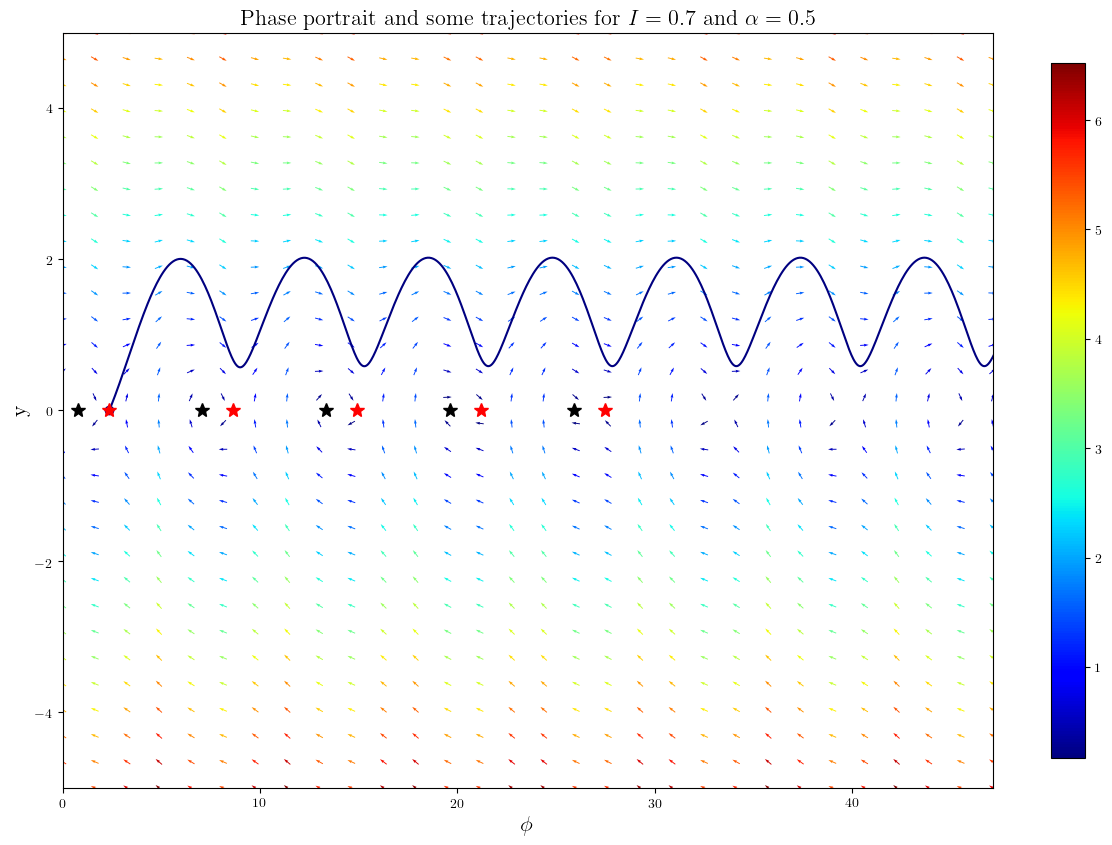

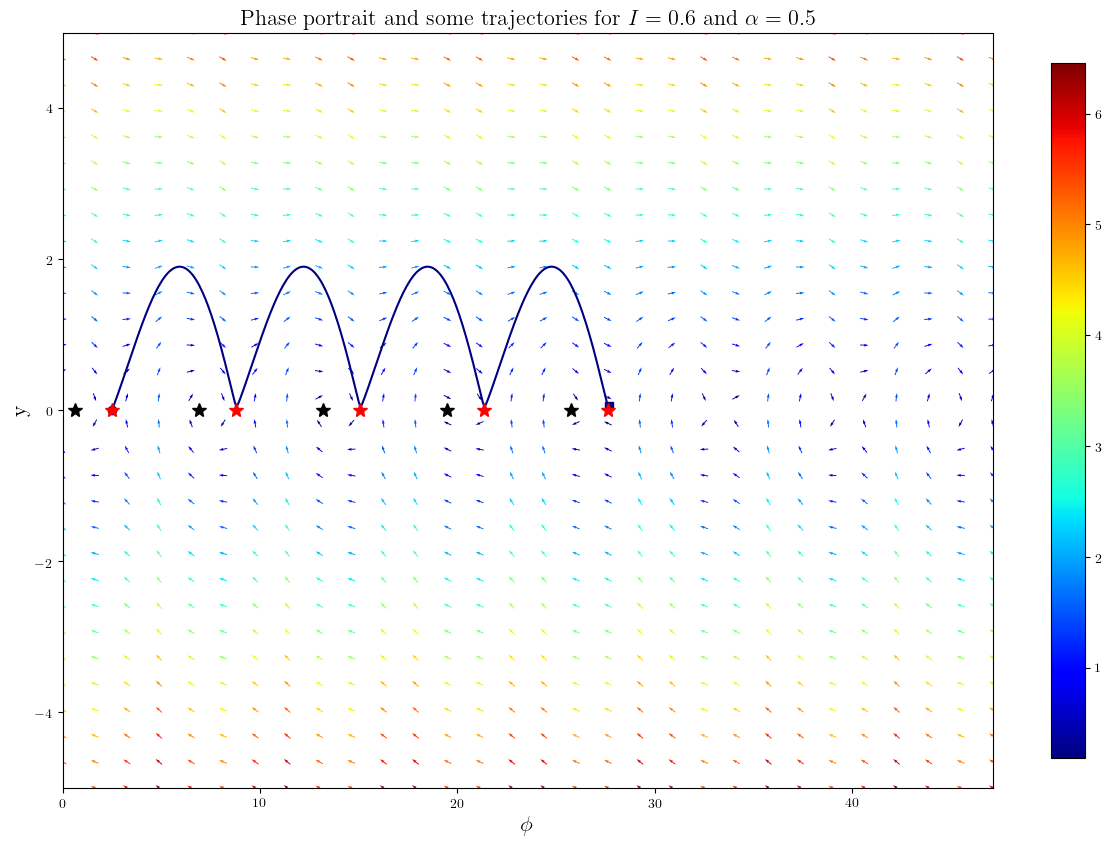

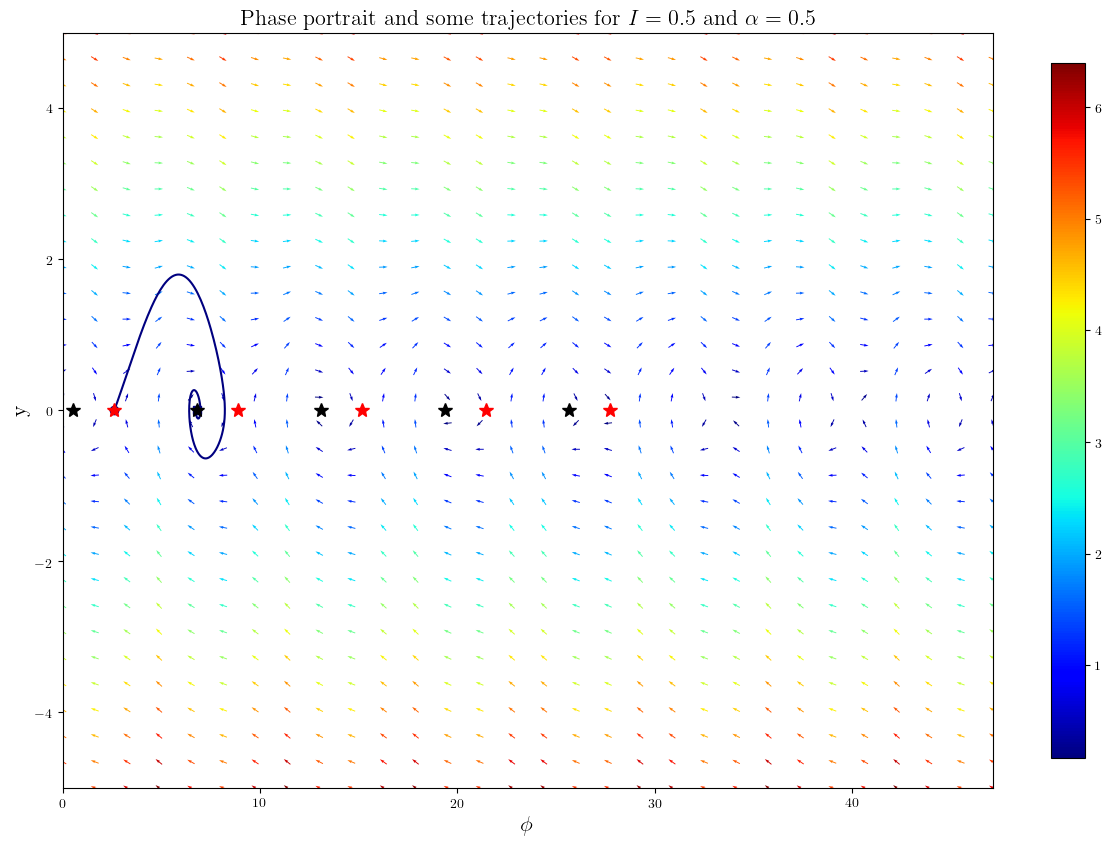

In [39]:
tmax = 50
number_of_time_steps= 1000
time_vec = np.linspace(0, tmax, number_of_time_steps)

alpha_v=.5
for I_v in [.8,.7,.6,.5]: #here we fixed the value of I. 
    sol=solve(calc_deri(Y,0,I_v,alpha_v),Y)
    numb_sol=len(sol)
    # range for the axis:
    ymax=5
    ymin=-ymax
    xmax=15*np.pi
    
    # number of arrows plotted on the phase portrait
    nb_points= 30                   

    # points where the arrows will be placed given by the grid X1,Y1
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(ymin, ymax, nb_points)
    X1 , Y1  = np.meshgrid(x, y)                       # create a grid
    
    # direction of the arrows
    DX1, DY1 = dX_dta([X1, Y1],I_v,alpha_v)                      # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 

    DX1 /= M                                        # Normalize each arrows 
    DY1 /= M                          


    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
   
    fig = plt.figure(figsize=(15, 10), dpi=100)
    plt.rc('text', usetex=True)  #for latex rendering in the figure's texts
    plt.rc('font', family='serif')

    plt.xlim(0, xmax) # impose limits on the axis
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\phi$',fontsize=16)
    plt.ylabel(r'y ',fontsize=16)
    plt.title(r"Phase portrait and some trajectories for "
              r'$I ={0}$ and $\alpha = {1}$'.format(I_v,alpha_v), fontsize=16, color='black')
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', scale=110,width=0.001,cmap=plt.cm.jet)
    #plt.legend()
    # plt.grid()
   
    N_trajectories=1  #number of trajectories plotted on top of the velocity field
    colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))
    i=0
    if True:
        for y0 in range(N_trajectories):
            yinit = (sol[1][0],sol[1][1]+.001)
            yarr = odeint(calc_deri, yinit, time_vec, args=(I_v,alpha_v))
            plt.plot(yarr[:, 0], yarr[:, 1], label='traject',color=colors[i])
            plt.plot([yarr[0,0]], [yarr[0,1]], 'o',color=colors[i]) # start
            plt.plot([yarr[-1,0]], [yarr[-1,1]], 's',color=colors[i]) # end
            i=i+1

    if numb_sol==2:
        temp1=np.array(sol[1][0]).astype(np.complex)
        temp2=np.array(sol[0][0]).astype(np.complex)
        
        if temp1.imag==0 and temp2.imag==0:
            for jj in range(5):
             plt.plot(sol[1][0]+2*np.pi*jj,sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[0][0]+2*np.pi*jj,sol[0][1],'*',color='black', markersize=10)
    plt.colorbar(shrink=.92)
    plt.show()
# 

Let us try to see the homoclinic trajectory. When $\alpha$ is small, the limit cycle can coexist with the fixed points (like above) but if we decrease I, the limit cycle will disappear.. 

KeyboardInterrupt: 

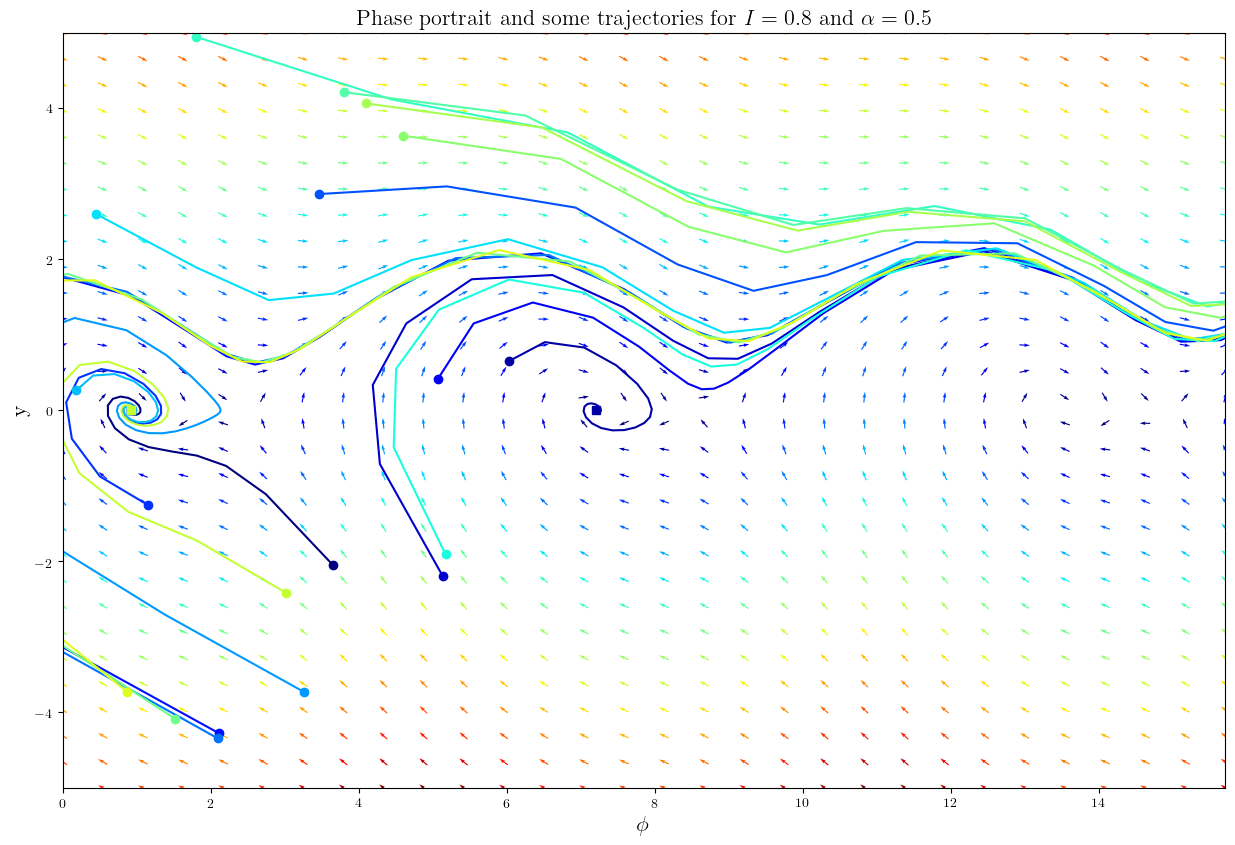

In [29]:
alpha_v=.5
for I_v in [.8,.5,.3,.1]: #here we fixed the value of I. 
    sol=solve(calc_deri(Y,0,I_v,alpha_v),Y)
    numb_sol=len(sol)
    # range for the axis:
    ymax=5
    ymin=-ymax
    xmax=5*np.pi
    
    # number of arrows plotted on the phase portrait
    nb_points= 30                   

    # points where the arrows will be placed given by the grid X1,Y1
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(ymin, ymax, nb_points)
    X1 , Y1  = np.meshgrid(x, y)                       # create a grid
    
    # direction of the arrows
    DX1, DY1 = dX_dta([X1, Y1],I_v,alpha_v)                      # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 

    DX1 /= M                                        # Normalize each arrows 
    DY1 /= M                          


    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
   
    fig = plt.figure(figsize=(15, 10), dpi=100)
    plt.rc('text', usetex=True)  #for latex rendering in the figure's texts
    plt.rc('font', family='serif')

    plt.xlim(0, xmax) # impose limits on the axis
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\phi$',fontsize=16)
    plt.ylabel(r'y ',fontsize=16)
    plt.title(r"Phase portrait and some trajectories for "
              r'$I ={0}$ and $\alpha = {1}$'.format(I_v,alpha_v), fontsize=16, color='black')
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', scale=110,width=0.001,cmap=plt.cm.jet)
    #plt.legend()
    # plt.grid()
   
    N_trajectories=30  #number of trajectories plotted on top of the velocity field
    colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))
    i=0
    if True:
        for y0 in range(N_trajectories):
            print("trajectory number ",y0)
            yinit = (random.random()*2*np.pi, ymin+random.random()*(ymax-ymin))
            yarr = odeint(calc_deri, yinit, time_vec, args=(I_v,alpha_v))
            plt.plot(yarr[:, 0], yarr[:, 1], label='traject',color=colors[i])
            plt.plot([yarr[0,0]], [yarr[0,1]], 'o',color=colors[i]) # start
            plt.plot([yarr[-1,0]], [yarr[-1,1]], 's',color=colors[i]) # end
            i=i+1

    if numb_sol==2:
        temp1=np.array(sol[1][0]).astype(np.complex)
        temp2=np.array(sol[0][0]).astype(np.complex)
        
        if temp1.imag==0 and temp2.imag==0:
            for jj in range(5):
             plt.plot(sol[1][0]+2*np.pi*jj,sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[0][0]+2*np.pi*jj,sol[0][1],'*',color='black', markersize=10)
            
    plt.show()
# 

The loop below will take a long time... 

KeyboardInterrupt: 

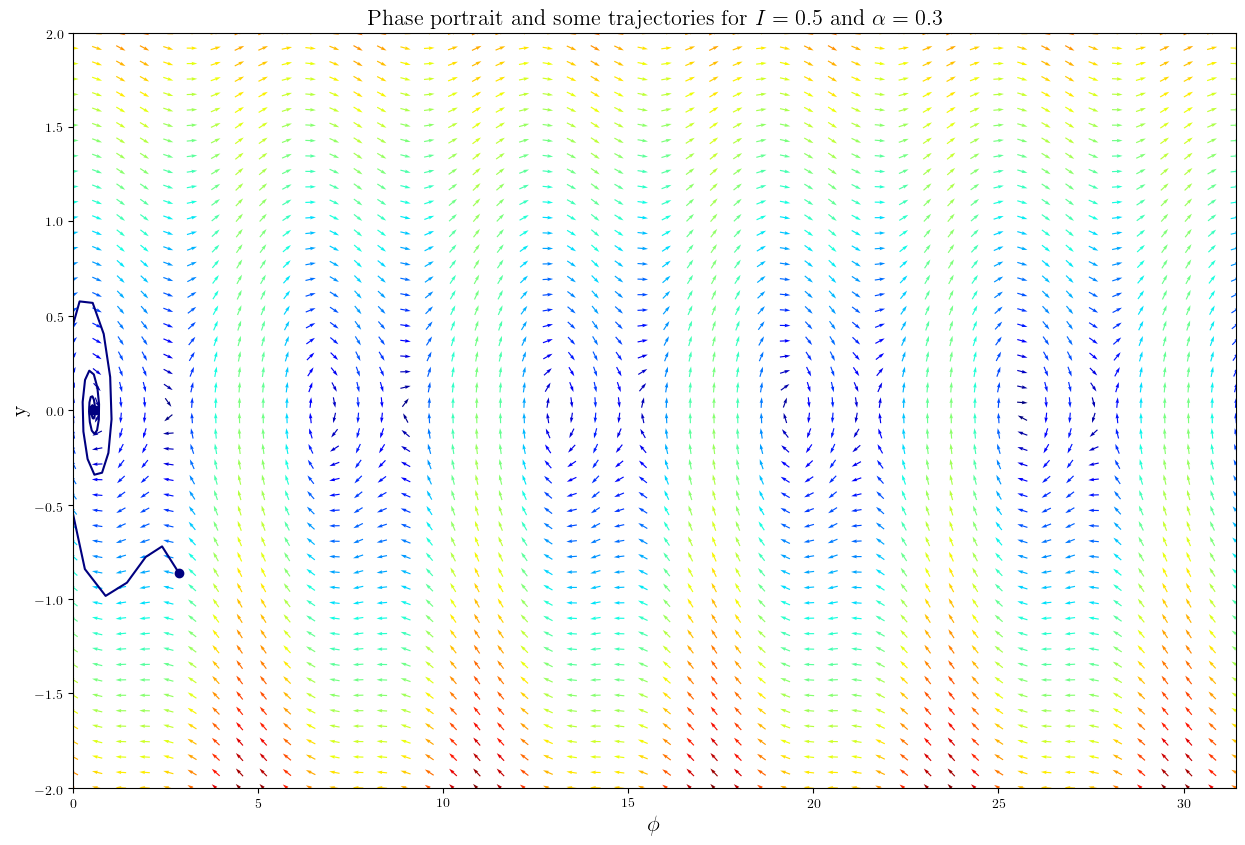

In [33]:
alpha_v=.3
for I_v in [.5,.9,.95,1,2]:
    sol=solve(calc_deri(Y,0,I_v,alpha_v),Y)
    numb_sol=len(sol)
    # range for the axis:
    ymax = 2
    ymin = -ymax
    xmax = 10*np.pi
    
    # number of arrows plotted on the phase portrait
    nb_points= 50                     

    # points where the arrows will be placed given by the grid X1,Y1
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(ymin, ymax, nb_points)
    X1 , Y1  = np.meshgrid(x, y)                       # create a grid
    
    # direction of the arrows
    DX1, DY1 = dX_dta([X1, Y1],I_v,alpha_v)                      # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 

    DX1 /= M                                        # Normalize each arrows 
    DY1 /= M                          


    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
   
    fig = plt.figure(figsize=(15, 10), dpi=100)
    plt.rc('text', usetex=True)  #for latex rendering in the figure's texts
    plt.rc('font', family='serif')

    plt.xlim(0, xmax) # impose limits on the axis
    plt.ylim(ymin, ymax)
    plt.xlabel(r'\phi',fontsize=16)
    plt.ylabel(r'y ',fontsize=16)
    plt.title(r"Phase portrait and some trajectories for "
              r'$I ={0}$ and $\alpha = {1}$'.format(I_v,alpha_v), fontsize=16, color='black')
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', scale=110,width=0.001,cmap=plt.cm.jet)
    #plt.legend()
    # plt.grid()
   
    N_trajectories=50  #number of trajectories plotted on top of the velocity field
    colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))
    i=0
    for y0 in range(N_trajectories):
        yinit = (random.random()*2*np.pi, ymin+random.random()*(ymax-ymin))
        yarr = odeint(calc_deri, yinit, time_vec, args=(I_v,alpha_v))
        plt.plot(yarr[:, 0], yarr[:, 1], label='traject',color=colors[i])
        plt.plot([yarr[0,0]], [yarr[0,1]], 'o',color=colors[i]) # start
        plt.plot([yarr[-1,0]], [yarr[-1,1]], 's',color=colors[i]) # end
        i=i+1

    if numb_sol==2:
        temp1=np.array(sol[1][0]).astype(np.complex)
        temp2=np.array(sol[0][0]).astype(np.complex)
        
        if temp1.imag==0 and temp2.imag==0:
             plt.plot(sol[1][0],sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[1][0]+np.pi,sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[1][0]+2*np.pi,sol[1][1],'*',color='red', markersize=10)
             plt.plot(sol[0][0],sol[0][1],'*',color='black', markersize=10)
             plt.plot(sol[0][0]+np.pi,sol[0][1],'*',color='black', markersize=10)
             plt.plot(sol[0][0]+2*np.pi,sol[0][1],'*',color='black', markersize=10)
            
    plt.show()
# 